#In this notebook we explain how to determine a threshold value to supply to MicroMPN.

MicroMPN is a command-line tool for calculating MPN values directly from microplates.
https://github.com/USDA-ARS-GBRU/micrompn

For additional resources on how to run MicroMPN see:
https://protocols.io/view/micrompn-software-for-automating-most-probable-num-cu5rwy56.html

# Input files
For this example, we converted the data from SpectraMax M3 to column format. For this we used the python script "four_col_updated.py".  

We will create a kernel density plot and histogram of rfu values at time point T0 and T48. We will demonstrate that the threshold generated from background readings at T0 is also valid for T48.

#All of the data files used here can be found in:
https://github.com/USDA-ARS-GBRU/MicroMPN_data-files
Path to files:
MicroMPN_data-files/SpectraMax_output_to_column_format

input files: 
example_t0_rfu.csv
soil_only.csv



In [ ]:
pip install seaborn 

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [3]:
#import T0 data file
df_t0 = pd.read_csv('example_t0_rfu.csv')
length = len(df_t0)
print("Length of dataframe df_t0:", length)


In [92]:
print(df_t0c)

     plate_unique       plate_id plate_well     rfu
0         plate_0  RFP_1_plate_1         A1  15.762
1         plate_0  RFP_1_plate_1         A2  12.590
2         plate_0  RFP_1_plate_1         A3   4.075
3         plate_0  RFP_1_plate_1         A4   3.343
4         plate_0  RFP_1_plate_1         A5   3.136
...           ...            ...        ...     ...
2299     plate_23  RFP_3_plate_1         H8   2.615
2300     plate_23  RFP_3_plate_1         H9   2.684
2301     plate_23  RFP_3_plate_1        H10   2.428
2302     plate_23  RFP_3_plate_1        H11   2.667
2303     plate_23  RFP_3_plate_1        H12   3.022

[2304 rows x 4 columns]


In [44]:
help(sns.distplot)


Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins. If unspecified, as reference rule is used
        that tries to find a useful default.
  

In [173]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Fit and plot a univariate or bivariate kernel density estimate.
    
    Parameters
    ----------
    data : 1d array-like
        Input data.
    data2: 1d array-like, optional
        Second input data. If present, a bivariate KDE will be estimated.
    shade : bool, optional
        If True, shade in the area under the KDE curve (or draw with filled
        contours when data is bivariate).
    vertical : bool, optional
        If True, density is on x-axis.
    kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
        Code for shape of kernel to fit with. Bivariate KDE can only use
        gaussian kernel.
    bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
     

Text(0, 0.5, 'Density')

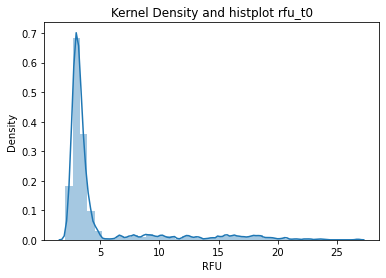

In [145]:
#PLOT_1_t0
# plot a density kernel and histogram of all the data
sns.distplot(df_t0["rfu"],bins = 40, kde=True)
plt.title('Kernel Density and histplot rfu_t0')
plt.xlabel("RFU")
plt.ylabel('Density')

In [97]:
#discard data point from the first two columns (columns 1 and 2 from a 96-well microplate)
#the wells in these columns have enough soil particulates to increas RFU values above media background

#make a copy of the original dataframe 
df_t0c = df_t0.copy()

#make a list of items to delete from the dataframe

letters = ["A","B","C","D","E","F","G","H"]

numbers = ['1','2']

ln = []

for item in letters:
    for num in numbers:
        ln.append(item+num)
        
print(ln)


#extract row indices to delete form dataframe
matching_indices =[]

for index, row in df_t0c.iterrows():
    if row["plate_well"] in ln:
        matching_indices.append(index)


print(matching_indices)

df_t0cd = df_t0c.drop(matching_indices)

df_t0cd = df_t0cd.reset_index(drop=True) 

print("lenght of dataframe after deleting the first two columns from every plate is:", len(df_t0cd))

['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'F1', 'F2', 'G1', 'G2', 'H1', 'H2']
[0, 1, 12, 13, 24, 25, 36, 37, 48, 49, 60, 61, 72, 73, 84, 85, 96, 97, 108, 109, 120, 121, 132, 133, 144, 145, 156, 157, 168, 169, 180, 181, 192, 193, 204, 205, 216, 217, 228, 229, 240, 241, 252, 253, 264, 265, 276, 277, 288, 289, 300, 301, 312, 313, 324, 325, 336, 337, 348, 349, 360, 361, 372, 373, 384, 385, 396, 397, 408, 409, 420, 421, 432, 433, 444, 445, 456, 457, 468, 469, 480, 481, 492, 493, 504, 505, 516, 517, 528, 529, 540, 541, 552, 553, 564, 565, 576, 577, 588, 589, 600, 601, 612, 613, 624, 625, 636, 637, 648, 649, 660, 661, 672, 673, 684, 685, 696, 697, 708, 709, 720, 721, 732, 733, 744, 745, 756, 757, 768, 769, 780, 781, 792, 793, 804, 805, 816, 817, 828, 829, 840, 841, 852, 853, 864, 865, 876, 877, 888, 889, 900, 901, 912, 913, 924, 925, 936, 937, 948, 949, 960, 961, 972, 973, 984, 985, 996, 997, 1008, 1009, 1020, 1021, 1032, 1033, 1044, 1045, 1056, 1057, 1068, 1069, 1080, 1081

Text(0, 0.5, 'Density')

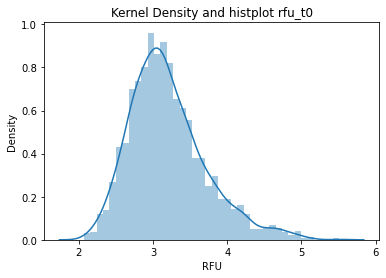

In [144]:
#PLOT_2_t0
# re-plot a density kernel and histogram after removing wells with high soil particulate
sns.distplot(df_t0cd["rfu"],bins = 40, kde=True)
plt.title('Kernel Density and histplot rfu_t0')
plt.xlabel("RFU")
plt.ylabel('Density')

the mean value is 3.1983739583333346
the standard deviation is 0.5155337340936077
lower limit is 0.6207052878652961
upper limit is 5.776042628801373


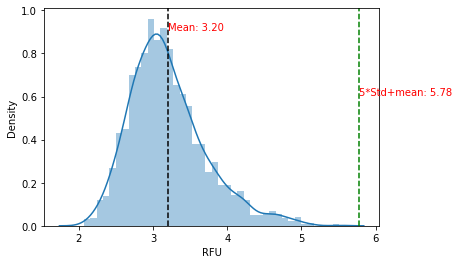

In [180]:
#PLOT_3_t0
#calculate standard deviations
mean_value_t0 = np.mean(df_t0cd["rfu"])
print("the mean value is", mean_value_t0)

std_dev_t0 = np.std(df_t0cd["rfu"])

print("the standard deviation is", std_dev_t0)

lower_limit_t0 = mean_value_t0 - (5*std_dev_t0)
upper_limit_t0 = mean_value_t0 + (5*std_dev_t0) 

print("lower limit is", lower_limit_t0)
print("upper limit is", upper_limit_t0)

#add mean value and 5X the standard deviation to plot
sns.distplot(df_t0cd["rfu"],bins = 40, kde=True)
plt.xlabel("RFU")
plt.ylabel('Density')
#plt.xlim(mean_value_t0, upper_limit_t0)

plt.text(mean_value_t0, plt.ylim()[1] * 0.9, f'Mean: {mean_value_t0:.2f}', color='red')
plt.text(upper_limit_t0, plt.ylim()[1] * 0.6, f'5*Std+mean: {upper_limit_t0:.2f}', color='red')

plt.axvline(mean_value_t0, color='black', linestyle='--', label='mean value')
#plt.axvline(lower_limit_t0, color='red', linestyle='--', label='Lower Limit')
plt.axvline(upper_limit_t0, color='green', linestyle='--', label='Upper Limit')

plt.show()
#for MicroMPN we chose a threshold value of 6.

In [117]:
#import T48 data file

df_t48 = pd.read_csv("soil_only.csv")
length = len(df_t48)
print("Length of dataframe df_t48:", length)


Length of dataframe df_t48: 1152


In [118]:
print(df_t48)

     plate_unique               plate_id plate_well      rfu
0         plate_0  RFP_1_plate_1_shaking         A1   22.163
1         plate_0  RFP_1_plate_1_shaking         A2  517.508
2         plate_0  RFP_1_plate_1_shaking         A3  532.510
3         plate_0  RFP_1_plate_1_shaking         A4  397.897
4         plate_0  RFP_1_plate_1_shaking         A5  425.865
...           ...                    ...        ...      ...
1147     plate_11          RFP_3_plate_1         H8    3.597
1148     plate_11          RFP_3_plate_1         H9    3.930
1149     plate_11          RFP_3_plate_1        H10    3.571
1150     plate_11          RFP_3_plate_1        H11    3.042
1151     plate_11          RFP_3_plate_1        H12    3.254

[1152 rows x 4 columns]


Text(0, 0.5, 'Density')

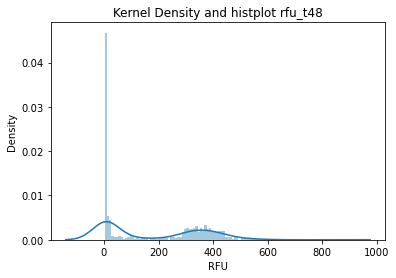

In [146]:
#PLOT_4_t48
# plot a density kernel and histogram of all the data
sns.distplot(df_t48["rfu"],bins = 100, kde=True)
plt.title('Kernel Density and histplot rfu_t48')
plt.xlabel("RFU")
plt.ylabel('Density')

In [125]:
#discard data point from the first two columns (columns 1 and 2 from a 96-well microplate)
#the wells in these columns have enough soil particulates to increas RFU values above media background

#make a copy of the original dataframe 
df_t48c = df_t48.copy()

#make a list of items to delete from the dataframe

letters = ["A","B","C","D","E","F","G","H"]

numbers = ['1','2']

ln = []

for item in letters:
    for num in numbers:
        ln.append(item+num)
        
print(ln)


#extract row indices to delete form dataframe
matching_indices48 =[]

for index, row in df_t48c.iterrows():
    if row["plate_well"] in ln:
        matching_indices48.append(index)


print(matching_indices48)

df_t48cd = df_t48c.drop(matching_indices48)

df_t48cd = df_t48cd.reset_index(drop=True) 

print("lenght of dataframe after deleting the first two columns from every plate is:", len(df_t48cd))

['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'F1', 'F2', 'G1', 'G2', 'H1', 'H2']
[0, 1, 12, 13, 24, 25, 36, 37, 48, 49, 60, 61, 72, 73, 84, 85, 96, 97, 108, 109, 120, 121, 132, 133, 144, 145, 156, 157, 168, 169, 180, 181, 192, 193, 204, 205, 216, 217, 228, 229, 240, 241, 252, 253, 264, 265, 276, 277, 288, 289, 300, 301, 312, 313, 324, 325, 336, 337, 348, 349, 360, 361, 372, 373, 384, 385, 396, 397, 408, 409, 420, 421, 432, 433, 444, 445, 456, 457, 468, 469, 480, 481, 492, 493, 504, 505, 516, 517, 528, 529, 540, 541, 552, 553, 564, 565, 576, 577, 588, 589, 600, 601, 612, 613, 624, 625, 636, 637, 648, 649, 660, 661, 672, 673, 684, 685, 696, 697, 708, 709, 720, 721, 732, 733, 744, 745, 756, 757, 768, 769, 780, 781, 792, 793, 804, 805, 816, 817, 828, 829, 840, 841, 852, 853, 864, 865, 876, 877, 888, 889, 900, 901, 912, 913, 924, 925, 936, 937, 948, 949, 960, 961, 972, 973, 984, 985, 996, 997, 1008, 1009, 1020, 1021, 1032, 1033, 1044, 1045, 1056, 1057, 1068, 1069, 1080, 1081

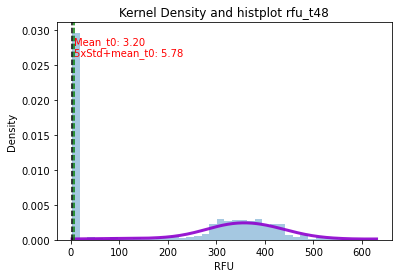

In [182]:
#PLOT_5_t48
# re-plot a density kernel and histogram after removing wells with high soil particulate
sns.distplot(df_t48cd["rfu"], bins = 40, kde=True, kde_kws = {'color':'#8e00ce', 
                       'linewidth':3, 'linestyle':'solid', 'alpha':0.9,'cut':0.0})
plt.title('Kernel Density and histplot rfu_t48')
plt.xlabel("RFU")
plt.ylabel('Density')

plt.text(upper_limit_t0, plt.ylim()[1] * 0.9, f'Mean_t0: {mean_value_t0:.2f}', color='red')
plt.text(upper_limit_t0, plt.ylim()[1] * 0.85, f'5xStd+mean_t0: {upper_limit_t0:.2f}', color='red')

plt.axvline(mean_value_t0, color='black', linestyle='--', label='mean value')
plt.axvline(6, color='green', linestyle='--', label='Upper Limit')

plt.show()

In [162]:
#FIND ALL THE ROWS WERE RFU IS LESS THAN 20 AND EXTRACTY TO A NEW DATAFRAME
#Then repeat analysis

selected_rows = []

for index, row in df_t48cd.iterrows():
    if row["rfu"] <= 20:
        selected_rows.append(row[['plate_unique','plate_id', 'plate_well', 'rfu']])

result_df = pd.DataFrame(selected_rows)

result_df = result_df.reset_index(drop=True)

print(len(result_df))
print(result_df)

447
    plate_unique               plate_id plate_well    rfu
0        plate_0  RFP_1_plate_1_shaking        A10  4.630
1        plate_0  RFP_1_plate_1_shaking        A11  4.151
2        plate_0  RFP_1_plate_1_shaking        A12  5.097
3        plate_0  RFP_1_plate_1_shaking        B11  4.817
4        plate_0  RFP_1_plate_1_shaking        B12  4.472
..           ...                    ...        ...    ...
442     plate_11          RFP_3_plate_1         H8  3.597
443     plate_11          RFP_3_plate_1         H9  3.930
444     plate_11          RFP_3_plate_1        H10  3.571
445     plate_11          RFP_3_plate_1        H11  3.042
446     plate_11          RFP_3_plate_1        H12  3.254

[447 rows x 4 columns]


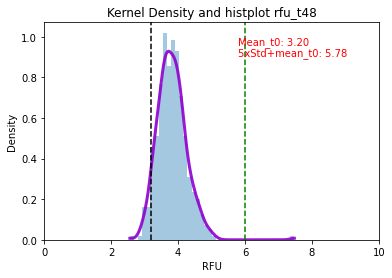

In [181]:
#PLOT_6_t48
# zoomong in to x = (0,20)
sns.distplot(result_df["rfu"], bins = 40, kde=True, kde_kws = {'color':'#8e00ce', 
                       'linewidth':3, 'linestyle':'solid', 'alpha':0.9,'cut':0.0})
plt.title('Kernel Density and histplot rfu_t48')
plt.xlabel("RFU")
plt.ylabel('Density')

plt.text(upper_limit_t0, plt.ylim()[1] * 0.9, f'Mean_t0: {mean_value_t0:.2f}', color='red')
plt.text(upper_limit_t0, plt.ylim()[1] * 0.85, f'5xStd+mean_t0: {upper_limit_t0:.2f}', color='red')

plt.axvline(mean_value_t0, color='black', linestyle='--', label='mean value')
plt.axvline(6, color='green', linestyle='--', label='Upper Limit')
plt.xlim(0,10)
plt.show()

#Discussion of plots

In our data, we used a threshold of 5-sigma above the mean_T0 (background fluorescence). 

The kernel density estimate (kde) is used to infer a probability density function from discrete data points.

The histogram approximates the kde plot through binning of the data.

PLOT_1_t0: all data points displayed with kde and histogram.

PLOT_2_t0: subset of data points for columns 3 - 12 of a 96-well microplate. Columns 1 and 2 have high soil background.
    
PLOT_3_t0: plot with mean rfu t0 and 5x-standard deviation. A threshold of 6 was ultimately chosen.

PLOT_4_t48:all data points displayed with kde and histogram.

PLOT_5_t48: all data points displayed with kde and the cut parameter (specifies how far the
curve should extend beyond the extreme data points. Bimodal distribution is evident.

PLOT_6_t48: we subset data points with RFU values less than 20 to show background mean of t48 which is just above 0.0. 
We overlayed the mean_t0 and std_t0 on the plot for comparison. 
All background data for t_48 are clearly below the threshold based on plots PLOT_2_t0 and PLOT_3_t0.







#Threshold Caveat

RFU values only slightly above threshold can indicate that Ralstonia is present, 
particularly at lower dilution factors, which are particularly susceptible to overgrowth of other microbes in the environment.
At higher dilution factors this effect dissapears as background microbes are diluted out, permitting growth of target.

Common sense should still be used to visually inspect plates used to generate data before running MicroMPN. 

For instance, a plate with consistently low RFU across all other plate replicates might 
indicate a systemic issue with target growth (see image below; data for synthetic community 6),
plasmid retention, incubation conditions, overgrowth of background, etc. 
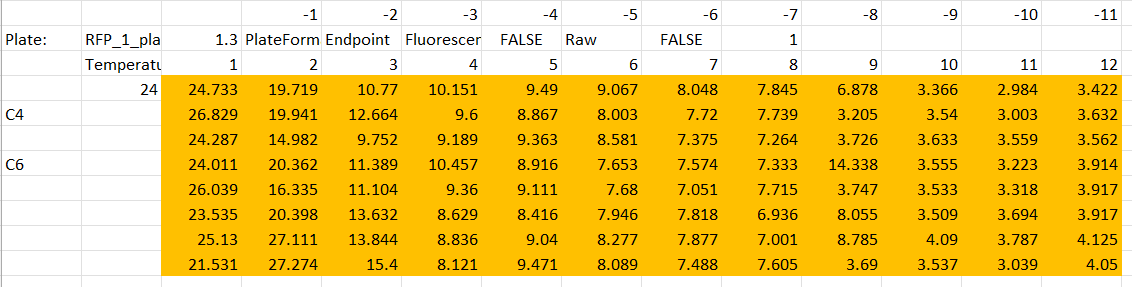

In this situation, even though the plate could be used to generate an MPN estimate, 
compared to other plates in the same series and experiment, 
it is obvious that there is a problem with expression of the fluorophore. 

In such a case, to conclude that the target was fully suppressed, 
more sensitive molecular techiniques (e.g. qPCR) should be employed.


In [ ]:
#issues with image, see file t48_negative_plate.png located in github folder MicroMPN_soil_and_synthetic_communities/Raw_data